In [ ]:
#Description: this is sentiment analysis program that pares the tweets fetched from twitter using python

In [2]:
#importing the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Login_key (1).csv to Login_key (1).csv


In [4]:
# get the data
log = pd.read_csv('Login_key (1).csv')

In [6]:
#twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [7]:
#create the authentication object
authenicate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#set the access token and access token secret
authenicate.set_access_token(accessToken, accessTokenSecret)

#create the API object while passing in the auth information
api = tweepy.API(authenicate, wait_on_rate_limit = True)

In [8]:
#extract 100 tweets from twitter
post = api.user_timeline(screen_name = "POTUS" , count = 100, lang ="en" , tweet_mode = "extended")

#print the last 5 tweets from the ac+count
i=1
for tweet in post[0:5]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

1)Today, we’ve passed 300 million shots in 150 days. 
When I took office, our nation was in crisis. Today, the virus is in retreat and our economy has smashed previous records for job growth. 
 
That’s just four months, folks.

2)Tune in as I deliver remarks on the COVID-19 response and the vaccination program. https://t.co/KCib2ZxgdV

3)I was honored to welcome Miss Opal Lee to the White House today. A daughter of Texas. And the grandmother of the movement to make Juneteenth a federal holiday. https://t.co/pl3tFSxGds

4)Today I signed the Juneteenth National Independence Day Act into law. https://t.co/Yt2zeRTzs0

5)Today, I had the honor of signing a bill to officially make Juneteenth a federal holiday. With this important step, all Americans can feel the power of the day, learn from our history, celebrate our progress, and grapple with the distance we still have to travel. https://t.co/UN5WgCiAy2



In [9]:
# Create a data frame with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in post] , columns = ['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,"Today, we’ve passed 300 million shots in 150 d..."
1,Tune in as I deliver remarks on the COVID-19 r...
2,I was honored to welcome Miss Opal Lee to the ...
3,Today I signed the Juneteenth National Indepen...
4,"Today, I had the honor of signing a bill to of..."


In [10]:
# Clean the text 

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removing @mentions
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyperlink

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,"Today, we’ve passed 300 million shots in 150 d..."
1,Tune in as I deliver remarks on the COVID-19 r...
2,I was honored to welcome Miss Opal Lee to the ...
3,Today I signed the Juneteenth National Indepen...
4,"Today, I had the honor of signing a bill to of..."
...,...
95,"Today, we are announcing a month-long effort t..."
96,"In just over four months, thanks to the Americ..."
97,Tune in as I give an update on our COVID-19 re...
98,We know from history that bold investments can...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"Today, we’ve passed 300 million shots in 150 d...",0.166667,-0.166667
1,Tune in as I deliver remarks on the COVID-19 r...,0.000000,0.000000
2,I was honored to welcome Miss Opal Lee to the ...,0.450000,0.400000
3,Today I signed the Juneteenth National Indepen...,0.000000,0.000000
4,"Today, I had the honor of signing a bill to of...",1.000000,0.400000
...,...,...,...
95,"Today, we are announcing a month-long effort t...",0.550000,0.250000
96,"In just over four months, thanks to the Americ...",0.375000,0.300000
97,Tune in as I give an update on our COVID-19 re...,0.000000,0.000000
98,We know from history that bold investments can...,0.333333,0.166667


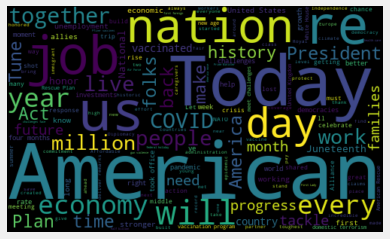

In [12]:
# Plot The Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height =  300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()